# Выявление сердечно-сосудистых заболеваний
## Источник: https://mlbootcamp.ru/round/12/sandbox/
## Информация о датасете

В рамках датасета вам нужно предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован из 100.000 реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст
 - Рост
 - Вес
 - Пол
 
Результаты измерения:

 - Артериальное давление верхнее и нижнее
 - Холестерин
 - Глюкоза
 
Субъективные признаки:

 - Курение
 - Употребление Алкоголя
 - Физическая активность

Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
from tqdm import tqdm_notebook as tqdm
warnings.filterwarnings('ignore')
data = pd.read_csv('heart_diseases/train.csv', sep = ';', engine = 'python')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [11]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
data[['age', 'weight','cholesterol','cardio']]

,age,weight,cholesterol,cardio
0,18393,62.0,1,0
1,20228,85.0,3,1
2,18857,64.0,3,1
3,17623,82.0,1,1
4,17474,56.0,1,0
5,21914,67.0,2,0
6,22113,93.0,3,0
7,22584,95.0,3,1
8,17668,71.0,1,0
9,19834,68.0,1,0


Преобразуем значение возраста к годам жизни.

In [30]:
data['age'] = data['age'].apply(lambda x: x/365)

In [14]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


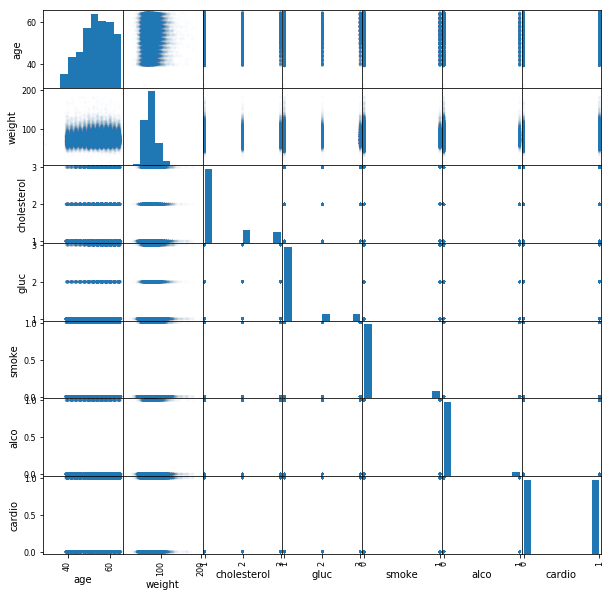

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['age','weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'cardio']], alpha = .01, figsize = (10, 10))
pass

Построим график распределения возраста и верхнего артериального давления 

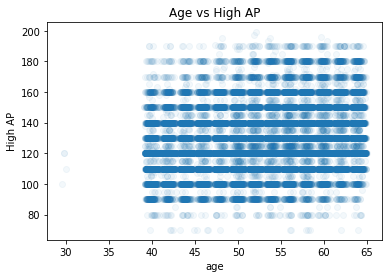

In [17]:
flt_data =data[(60 < data['ap_hi']) & (data['ap_hi'] < 200)]
plt.plot(flt_data['age'], flt_data['ap_hi'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('High AP')
plt.title('Age vs High AP')
pass

Наблюдаем логичную картину - у старых людей наблюдается повышенное артериальное давление (*гипертония*).

Теперь посмотрим, как дела обстоят с уровнем холестерина.

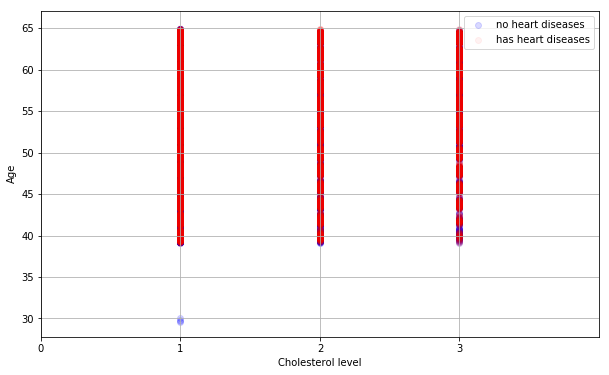

In [18]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['cardio'] == 0]['cholesterol'],
            data[data['cardio'] == 0]['age'],
            alpha = 0.15,
            label = 'no heart diseases',
            color = 'b')

plt.scatter(data[data['cardio'] == 1]['cholesterol'],
            data[data['cardio'] == 1]['age'],
            alpha = 0.05,
            label = 'has heart diseases',
            color = 'r')

plt.xlabel('Cholesterol level')
plt.xticks(range(4))
plt.xlim(0,4)
plt.ylabel('Age')
plt.legend()
plt.grid()

Получилось не очень наглядно, т.к. объекты двух классов сливаются.
Добавим рассеивание в данные.

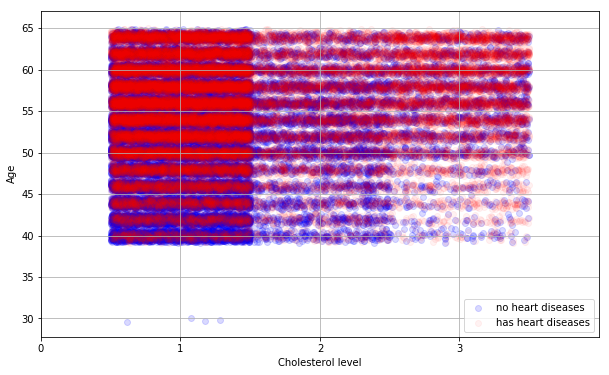

In [19]:
np.random.seed(0)
cholesterol_rnd = data['cholesterol'] + np.random.rand(data.shape[0]) - .5
plt.figure(figsize = (10, 6))

plt.scatter(cholesterol_rnd[data['cardio'] == 0],
            data[data['cardio'] == 0]['age'],
            alpha = 0.15,
            label = 'no heart diseases',
            color = 'b')

plt.scatter(cholesterol_rnd[data['cardio'] == 1],
            data[data['cardio'] == 1]['age'],
            alpha = 0.05,
            label = 'has heart diseases',
            color = 'r')

plt.xlabel('Cholesterol level')
plt.xticks(range(4))
plt.xlim(0,4)
plt.ylabel('Age')
plt.legend()
plt.grid()

Видно, что сердечно-сосудистые заболевания наблюдаются чаще у:
1. Людей пожилого возраста
2. У людей с более высоким уровнем холестерина

В принципе, это логично: повышенное содержание холестерина в крови является одной из причин сердечно-сосудистых заболеваний.

Теперь посмотрим, как влияет вес и возраст на вероятность появления ССЗ:

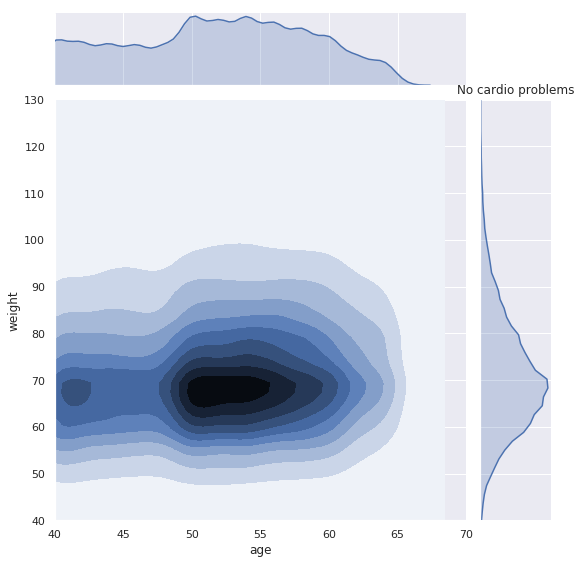

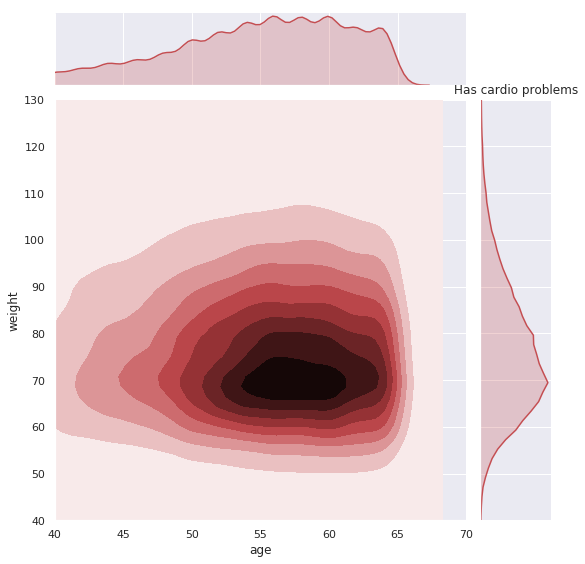

In [47]:
sns.jointplot(x="age", y="weight" ,data = data[data['cardio']==0], kind='kde', xlim=(40,70), ylim= (40, 130), height = 8)
plt.title("No cardio problems")
sns.jointplot(x="age", y="weight" ,data = data[data['cardio']==1], kind='kde', xlim=(40,70), ylim= (40, 130), height = 8, color="r")
plt.title("Has cardio problems")
pass

По данному графику распределения можно видеть смещение по оси возраста - чем старше, тем выше риск. 
А вот вес не особо влияет на выявление ССЗ, судя по графикам.

Посмотрим, сколько пропущенных значений есть в наших данных:

In [4]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

У нас нет пропущенных данных, можем приступать к обучению моделей.

## Домашняя работа №2
Оценим ошибку байесовского классификатора, решив задачу методом ближайшего соседа.
Тогда оценка будет в ~2 меньше ошибки на указанном методе.

In [3]:
X = data.drop('cardio', axis=1)
y = data['cardio'].as_matrix()

Подготовим данные, проведя нормализацию и разбив выборку на тренировочную и тестовую в соотношении **4:1**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

56000 14000


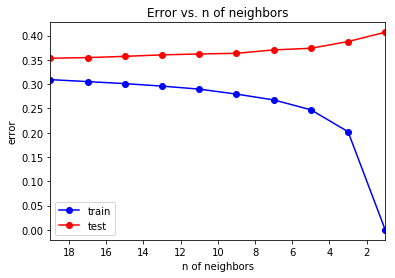

In [15]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_list = list(range(1, 20, 2))
train_err_list = []
test_err_list = []
for n_neighbors in tqdm(neighbors_list):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test = np.mean(y_test != y_test_predict)
    train_err_list.append(err_train)
    test_err_list.append(err_test)

plt.plot(neighbors_list, train_err_list, 'b-o', label='train')
plt.plot(neighbors_list, test_err_list, 'r-o', label='test')
plt.xlim([np.max(neighbors_list), np.min(neighbors_list)])
plt.title('Error vs. n of neighbors')
plt.xlabel('n of neighbors')
plt.ylabel('error')
plt.legend()
pass


Видно, что с ростом k растет ошибка на тренировочной и слегка уменьшается на тестовой.  
Ошибка на тестовой выборке примерно равна **35%**.  
Следовательно, можно ожидать ошибку байессовского классификатора примерно равную **17-18%**.

## Домашняя работа №3
Решим задачу, используя многослойный персептрон.  
Попробуем подобрать оптимальный параметр **alpha**:

In [43]:
from sklearn.neural_network import MLPClassifier

alpha_arr = np.logspace(-4, -1, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(100, 150, 200, 250),
                              activation='logistic', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


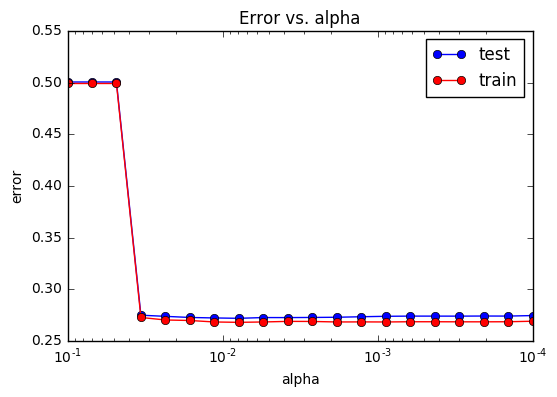

In [44]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Выберем **alpha**, дающую наилучший результат при тренировке.


In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

0.271892857143 0.268
0.00784759970351


Теперь попробуем подобрать оптимальное количество нейронов в скрытых слоях


[20 30 40 50]
[ 40  60  80 100]
[ 60  90 120 150]
[ 80 120 160 200]
[100 150 200 250]
[120 180 240 300]
[140 210 280 350]
[160 240 320 400]
[180 270 360 450]
[200 300 400 500]


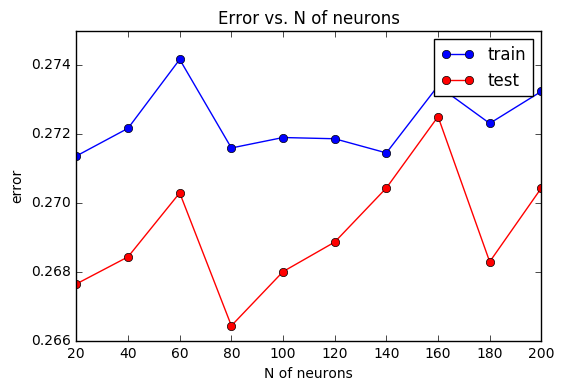

In [5]:
from sklearn.neural_network import MLPClassifier
neurons_arr = np.linspace(20,200, 10)
neurons_coeff = np.array([1.0, 1.5, 2.0, 2.5])
test_err = []
train_err = []
alpha_opt = 0.00784759970351
for nneurons in neurons_arr:
    neurons = (nneurons * neurons_coeff).astype(int)
    print(neurons)
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = neurons,
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.plot(neurons_arr, train_err, 'b-o', label = 'train')
plt.plot(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs. N of neurons')
plt.xlabel('N of neurons')
plt.ylabel('error')
plt.legend()
pass

В данном случае наблюдается явное недообучение, даже нужна более глубокая структура для лучшей классификации.
Возможно, что многослойный персептрон - не лучший выбор дла данной задачи.

Посмотрим на основные метрики и диаграмму рассеивания для модели со следующими параметрами:
* *alpha* = 0.00784759970351
* *neurons number* = 80, 120, 160, 200


In [9]:
mlp_model = MLPClassifier(alpha = 0.00784759970351, hidden_layer_sizes = (80, 120, 160, 200),
                              activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_error = np.mean(y_train != y_train_pred)
test_error = np.mean(y_test != y_test_pred)
print(train_error, test_error)

0.271589285714 0.266428571429


### Матрица рассогласования

[[5423 2165]
 [1565 4847]]


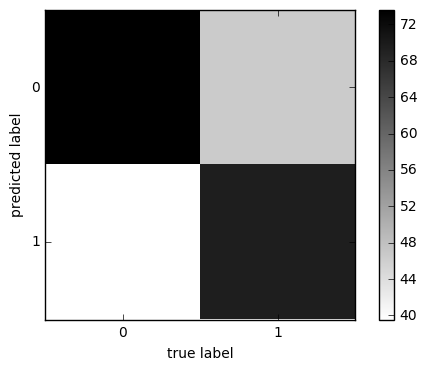

In [10]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test_pred, y_test)
print(M)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### Метрики качества

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.71      0.78      0.74      6988
          1       0.76      0.69      0.72      7012

avg / total       0.74      0.73      0.73     14000



## Домашняя работа №4

Выполним сравнительный анализ 4 методов:
- Random forests
- Extremely random forests
- Adaboost
- Gradient boosted trees

Для каждого из них построим классификаторы, параметризованные по количеству деревьев, посмтроим график зависимости ошибок на тренировочной и тестовой выборках, в конце сделаем общие выводы о эффективности данных подходов.


### Random forests

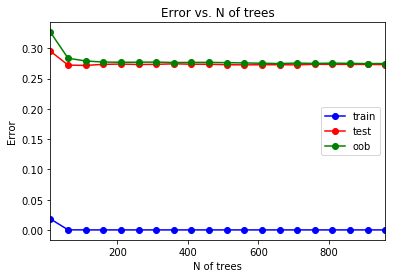

In [10]:
from sklearn.ensemble import RandomForestClassifier
test_err = []
train_err = []
obb_err = []
n_trees_list = np.arange(10, 1000, 50)
for n_trees in tqdm(n_trees_list):
    model = RandomForestClassifier(random_state=42, n_estimators=n_trees, oob_score=True)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    obb_err.append(1 - model.oob_score_)
    
plt.plot(n_trees_list, train_err, 'b-o', label='train')
plt.plot(n_trees_list, test_err, 'r-o', label='test')
plt.plot(n_trees_list, obb_err, 'g-o', label='oob')
plt.xlim([np.min(n_trees_list), np.max(n_trees_list)])
plt.title('Error vs. N of trees')
plt.xlabel('N of trees')
plt.ylabel('Error')
plt.legend()
pass

### extremely randomized trees

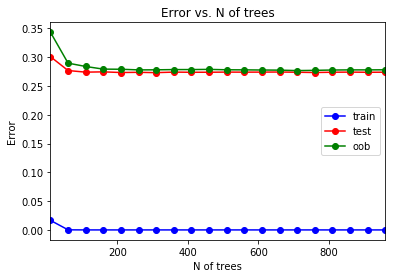

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
test_err = []
train_err = []
obb_err = []
n_trees_list = np.arange(10, 1000, 50)
for n_trees in tqdm(n_trees_list):
    model = ExtraTreesClassifier(random_state=42, n_estimators=n_trees, oob_score=True, bootstrap = True)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    obb_err.append(1 - model.oob_score_)
    
plt.plot(n_trees_list, train_err, 'b-o', label='train')
plt.plot(n_trees_list, test_err, 'r-o', label='test')
plt.plot(n_trees_list, obb_err, 'g-o', label='oob')
plt.xlim([np.min(n_trees_list), np.max(n_trees_list)])
plt.title('Error vs. N of trees')
plt.xlabel('N of trees')
plt.ylabel('Error')
plt.legend()
pass

### AdaBoost

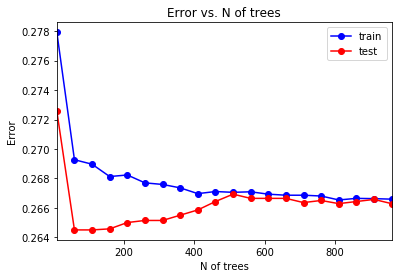

In [13]:
from sklearn.ensemble import AdaBoostClassifier
test_err = []
train_err = []
n_trees_list = np.arange(10, 1000, 50)
for n_trees in tqdm(n_trees_list):
    model = AdaBoostClassifier(random_state=42, n_estimators=n_trees)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.plot(n_trees_list, train_err, 'b-o', label='train')
plt.plot(n_trees_list, test_err, 'r-o', label='test')
plt.xlim([np.min(n_trees_list), np.max(n_trees_list)])
plt.title('Error vs. N of trees')
plt.xlabel('N of trees')
plt.ylabel('Error')
plt.legend()
pass

### gradient boosted trees

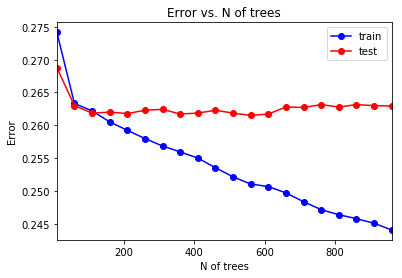

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
test_err = []
train_err = []
n_trees_list = np.arange(10, 1000, 50)
for n_trees in tqdm(n_trees_list):
    model = GradientBoostingClassifier(random_state=42, n_estimators=n_trees)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.plot(n_trees_list, train_err, 'b-o', label='train')
plt.plot(n_trees_list, test_err, 'r-o', label='test')
plt.xlim([np.min(n_trees_list), np.max(n_trees_list)])
plt.title('Error vs. N of trees')
plt.xlabel('N of trees')
plt.ylabel('Error')
plt.legend()
pass

Основные выводы:
- Данное семейство методов показывает сравнительно хорошую скорость обучения не в ущерб качеству по сравнению с ранее использованными методами (KNN, MLP)
- Почти на всех моделях наблюдается переобучение
- Лучший результат - 26.3% ошибки на тестовой выборке
- Рост количества деревьев улучшает качество модели до наступления уровня насыщения, далее необходима подгонка других гиперпараметров



## Домашняя работа №5
Применим метод алгоритм главных компонент к нашим данным, построим график зависимости ошибки от количества отобранных признаков.
В качестве классификатора воспользуемся Gradient Boostes Trees.

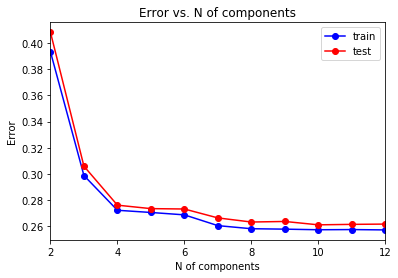

In [7]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

train_err, test_err = [], []
for n_components in tqdm(range(2, 13)):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    X_scaled = preprocessing.scale(X_reduced)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = GradientBoostingClassifier(random_state=42, n_estimators=200)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(range(2,13), train_err, 'b-o', label='train')
plt.plot(range(2, 13), test_err, 'r-o', label='test')
plt.xlim([2, 12])
plt.title('Error vs. N of components')
plt.xlabel('N of components')
plt.ylabel('Error')
plt.legend()
pass

Основные выводы:
* уменьшение размерности пространства признаков до 7-8 практически не ведет к ухудшению модели, можно предположить, что это оптимальная размерность.

Наилучшее колиество компонент с точки зрения минимальной ошибки на тестовой выборке:

In [9]:
print(min(range(2,13), key=lambda x: test_err[x-2]))

10
